In [2]:
#1 import libs
import pandas as pd
import numpy as np
from fastai.vision import *
from fastai.metrics import *
from PIL import Image
import random as rnd
import os

%matplotlib inline

In [8]:
#2 Paths
PATH = Path('D:\\python\\Kaggle\\Digit_Recognizer')
train_df = pd.read_csv('https://github.com/piyush2896/Digit-Recognizer-Code/raw/master/train.csv')
test_df = pd.read_csv('https://github.com/piyush2896/Digit-Recognizer-Code/raw/master/test.csv')
# train_df = pd.read_csv('Data/train.csv')
# test_df = pd.read_csv('Data/test.csv')

In [17]:
#3 make dirs for test and train \+ subfolders
if not os.path.isdir(PATH/'TEST'):
    os.makedirs(PATH/'TEST')
    print('TEST path created')
    
if not os.path.isdir(PATH/'TRAIN'):
    os.makedirs(PATH/'TRAIN')
    
    print('TRAIN path created')
    for i in range(10):
        os.makedirs(PATH/'TRAIN'/str(i))
    print('Train 0-9 folders created')
    
TRAIN = PATH/'TRAIN'
TEST = PATH/'TEST'

TEST path created
TRAIN path created
Train 0-9 folders created


In [18]:
#4 def pix2img
def pix2img(pix_data, filepath):
    
    # convert tuple 784 > matrix 28x28
    img_mat = pix_data.reshape(28,28)
    
    # change type to prevent errors
    img_mat = img_mat.astype(np.uint8())
    
    # convert by PIL
    img_dat = Image.fromarray(img_mat)
    
    # create .jpg
    img_dat.save(filepath)

In [19]:
#5 create .jpg from arrays
for idx, data in train_df.iterrows():
    
    # cut label column off other data
    label, data = data[0], data[1:]
    
    # folder = num from 'label'
    folder = TRAIN/str(label)
    
    # name for file (0+)
    fname = f"{idx}.jpg"
    
    # fullpath to new file
    filepath = folder/fname
    
    # scrap pixel values for > .jpg
    img_data = data.values
    
    # convert by PIL
    pix2img(img_data,filepath)

In [20]:
#6 ^ same with TEST but without subfolders
for idx, data in test_df.iterrows():

    folder = TEST
    
    # name for file (0+)
    fname = f"{idx}.jpg"
    
    # fullpath to new file
    filepath = TEST/fname
    
    # scrap pixel values for > .jpg
    img_data = data.values
    
    # convert by PIL
    pix2img(img_data,filepath)

In [21]:
#7 we need to know full path in Windows
print(TRAIN)
print(TEST)

D:\python\Kaggle\Digits\TRAIN
D:\python\Kaggle\Digits\TEST


In [23]:
#8 create databunch
data = ImageDataBunch.from_folder(path=('D:\\python\\Kaggle\\Digit_Recognizer\\TRAIN'), 
                                  test=('D:\\python\\Kaggle\\Digit_Recognizer\\TEST'),
                                  valid_pct=0.1, bs=256, size=28,
                                  num_workers=0, ds_tfms=get_transforms(do_flip=False))

In [24]:
#9 normalize data
data.normalize(imagenet_stats);

In [25]:
#8.5 check number of classes
print(data.classes)
print('There are', data.c, 'classes here')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
There are 10 classes here


In [26]:
#10 create 3 learners 18\34\50
learn18 = cnn_learner(data, base_arch = models.resnet18, metrics = accuracy, callback_fns=ShowGraph)

learn34 = cnn_learner(data, base_arch = models.resnet34, metrics = accuracy, callback_fns=ShowGraph)

learn50 = cnn_learner(data, base_arch = models.resnet50, metrics = accuracy, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,1.232832,0.798333,0.750714,00:57
1,0.687051,0.542878,0.823810,00:56
2,0.546243,0.484538,0.846667,00:56


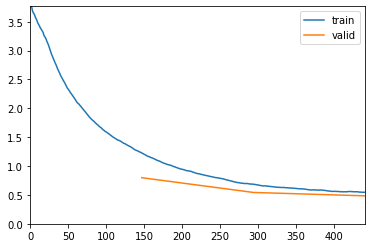

In [130]:
#11 first fit_one_cycles
learn18.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.150657,0.659355,0.783810,00:59
1,0.613114,0.396793,0.873333,00:57
2,0.484522,0.359207,0.885000,00:59


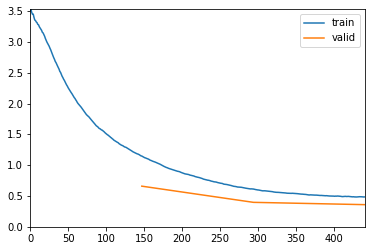

In [131]:
learn34.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.099665,0.692433,0.781190,01:05
1,0.592097,0.395135,0.877619,01:05
2,0.438809,0.344944,0.890714,01:06


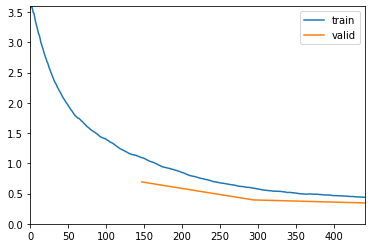

In [132]:
learn50.fit_one_cycle(3)

In [133]:
#12 .unfreeze
learn18.unfreeze()
learn34.unfreeze()
learn50.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


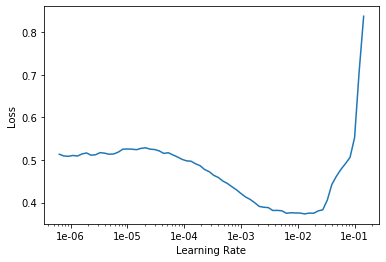

In [134]:
#13 lr_find
learn18.lr_find()
learn18.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


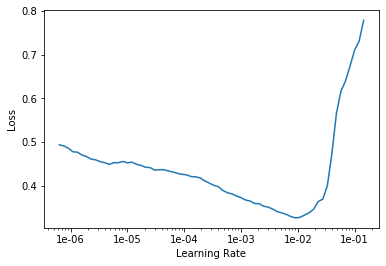

In [135]:
learn34.lr_find()
learn34.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


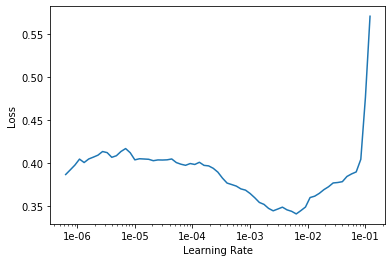

In [136]:
learn50.lr_find()
learn50.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.124793,0.067742,0.977619,00:58
1,0.088684,0.066512,0.980714,00:56
2,0.081096,0.066224,0.983571,00:56
3,0.084464,0.077932,0.980952,00:56
4,0.083687,0.052077,0.987381,00:57
5,0.087520,0.081520,0.981429,00:56
6,0.072429,0.112376,0.977143,00:57
7,0.066012,0.065073,0.982143,00:56
8,0.060958,0.062613,0.985238,00:56
9,0.052236,0.043253,0.991429,00:56


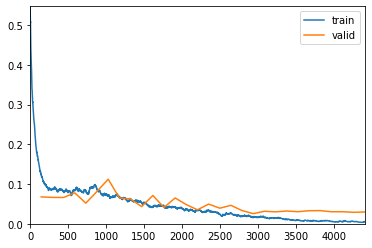

In [137]:
#14 fit lr_max
learn18.fit_one_cycle(30, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.110368,0.057622,0.979286,01:01
1,0.069671,0.061748,0.981429,01:01
2,0.071220,0.063395,0.982619,01:02
3,0.073433,0.055940,0.985238,01:03
4,0.072429,0.081356,0.978095,01:03
5,0.075696,2.867130,0.851429,01:03
6,0.069183,0.060519,0.984762,01:03
7,0.063902,0.059565,0.986429,01:03
8,0.057250,0.058085,0.988333,01:03
9,0.062728,0.046974,0.989286,01:03


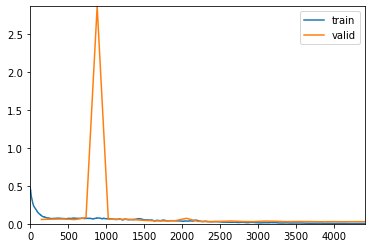

In [138]:
learn34.fit_one_cycle(30, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.113506,0.054389,0.983571,01:10
1,0.070763,0.061278,0.981905,01:11
2,0.069830,0.056802,0.983333,01:11
3,0.070527,0.058336,0.984286,01:09
4,0.099787,0.080293,0.978333,01:11
5,0.068647,0.087904,0.980238,01:11
6,0.061371,0.048820,0.988810,01:12
7,0.097567,6001.943848,0.418571,01:12
8,0.058510,0.043245,0.989048,01:11
9,0.050943,0.044208,0.988571,01:12


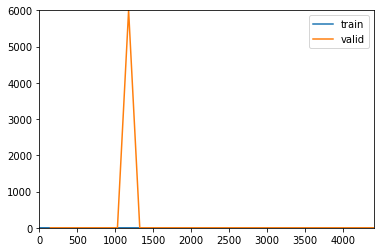

In [139]:
learn50.fit_one_cycle(30, slice(8e-4, 8e-3))

In [141]:
#15 scrap results to csv

# get_preds
class_score18 , trash = learn18.get_preds(DatasetType.Test)

# pick only max value for each picture
class_score18 = np.argmax(class_score18, axis=1)

# remove file extension from filename
ImageId = [os.path.splitext(path)[0] for path in os.listdir(TEST)]

# typecast to int so that file can be sorted by ImageId
ImageId = [int(path) for path in ImageId]

# +1 because index starts at 1 in the submission file
ImageId = [ID+1 for ID in ImageId]

# create final result
submission  = pd.DataFrame({
    "ImageId": ImageId,
    "Label": class_score18})

# save it
submission.to_csv("digits-submission-r18.csv", index=False)

In [142]:
class_score34 , trash = learn34.get_preds(DatasetType.Test)
class_score50 , trash = learn34.get_preds(DatasetType.Test)

class_score34 = np.argmax(class_score34, axis=1)
class_score50 = np.argmax(class_score50, axis=1)

submission34  = pd.DataFrame({
    "ImageId": ImageId,
    "Label": class_score34})
submission50  = pd.DataFrame({
    "ImageId": ImageId,
    "Label": class_score50})

submission34.to_csv("digits-submission-r34.csv", index=False)
submission50.to_csv("digits-submission-r50.csv", index=False)

In [143]:
learn18.save('Models/model-18')
learn34.save('Models/model-34')
learn50.save('Models/model-50')

In [10]:
learn18.load('Models/model-18');
learn34.load('Models/model-34');
learn50.load('Models/model-50');